In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/data_rate.csv')
data["Date"] = pd.to_datetime(data["Date"])

In [3]:
#Creating month interval

month_group_sum = data.groupby([pd.Grouper(key='Date', freq='M'), 'symbol']).log_rate.sum()
data_month_rate = pd.DataFrame(month_group_sum).reset_index()

month_group_mean = data.groupby([pd.Grouper(key='Date', freq='M'), 'symbol']).score.mean()
data_month_score = pd.DataFrame(month_group_mean).reset_index()

data_month = pd.DataFrame({"Date":data_month_rate["Date"],"symbol": data_month_rate["symbol"],"score":data_month_score["score"], "rate":data_month_rate["log_rate"]})

In [4]:
#Creating 6 month interval

hyear_group_sum = data.groupby([pd.Grouper(key='Date', freq='6M'), 'symbol']).log_rate.sum()
data_hyear_rate = pd.DataFrame(hyear_group_sum).reset_index()

hyear_group_mean = data.groupby([pd.Grouper(key='Date', freq='6M'), 'symbol']).score.mean()
data_hyear_score = pd.DataFrame(hyear_group_mean).reset_index()

data_hyear = pd.DataFrame({"Date":data_hyear_rate["Date"],"symbol": data_hyear_rate["symbol"],"score":data_hyear_score["score"], "rate":data_hyear_rate["log_rate"]})

In [5]:
#Creating year interval

year_group_sum = data.groupby([pd.Grouper(key='Date', freq='Y'), 'symbol']).log_rate.sum()
data_year_rate = pd.DataFrame(year_group_sum).reset_index()

year_group_mean = data.groupby([pd.Grouper(key='Date', freq='Y'), 'symbol']).score.mean()
data_year_score = pd.DataFrame(year_group_mean).reset_index()

data_year = pd.DataFrame({"Date":data_year_rate["Date"],"symbol": data_year_rate["symbol"],"score":data_year_score["score"], "rate":data_year_rate["log_rate"]})

# 1 MONTH

In [6]:
X_month = np.array(list(data_month.iloc[:, 2]))
y_month = np.array(list(data_month.iloc[:, 3]))

## SVR MODEL

In [7]:
scores_month_SVR = []
best_svr = SVR(kernel='rbf')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_month):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_month[train_index], X_month[test_index], y_month[train_index], y_month[test_index]
    print(X_train)
    best_svr.fit(X_train.reshape(-1, 1), y_train)
    scores_month_SVR.append(best_svr.score(X_test.reshape(-1, 1), y_test))

Train Index:  [    1     2     4 ... 15651 15652 15654] 

Test Index:  [    0     3    14 ... 15648 15649 15653]
[0.66806105 0.74437505 0.66962094 ... 0.73524161 0.77899681 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [    8    15    33 ... 15603 15634 15639]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   17    36    39 ... 15601 15612 15636]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   10    23    29 ... 15613 15616 15617]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15651 15652 15653] 

Test Index:  [   12    20    28 ... 15647 15650 15654]
[0.66204726 0.66806105 0.74437505 ... 0.73524161 0.77899681 0.80271737]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   

In [8]:
SVR_1M_MAE = np.mean(np.absolute(scores_month_SVR - y_test.reshape(-1, 1)))
SVR_1M_MSE = ((scores_month_SVR - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1M SVR Model: %.5f" % SVR_1M_MSE)
print("Mean absolute error (MAE) for 1M SVR Model: %.5f" % SVR_1M_MAE)

Mean squared error (MSE) for 1M SVR Model: 0.00552
Mean absolute error (MAE) for 1M SVR Model: 0.05372


## Decision Tree Regressor

In [9]:
scores_month_DT = []
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_month):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_month[train_index], X_month[test_index], y_month[train_index], y_month[test_index]
    print(X_train)
    dtree.fit(X_train.reshape(-1, 1), y_train)
    scores_month_DT.append(dtree.score(X_test.reshape(-1, 1), y_test))

Train Index:  [    1     2     4 ... 15651 15652 15654] 

Test Index:  [    0     3    14 ... 15648 15649 15653]
[0.66806105 0.74437505 0.66962094 ... 0.73524161 0.77899681 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [    8    15    33 ... 15603 15634 15639]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   17    36    39 ... 15601 15612 15636]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   10    23    29 ... 15613 15616 15617]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15651 15652 15653] 

Test Index:  [   12    20    28 ... 15647 15650 15654]
[0.66204726 0.66806105 0.74437505 ... 0.73524161 0.77899681 0.80271737]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   

In [10]:
DT_1M_MAE = np.mean(np.absolute(scores_month_DT - y_test.reshape(-1, 1)))
DT_1M_MSE = ((scores_month_DT - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MSE)
print("Mean absolute error (MAE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MAE)

Mean squared error (MSE) for 1M Decision Tree Regressor: 0.00551
Mean absolute error (MAE) for 1M Decision Tree Regressor: 0.05365


## LASSO Regression

In [11]:
scores_month_LASSO = []
lasso_reg = Lasso(alpha=0.1)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_month):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_month[train_index], X_month[test_index], y_month[train_index], y_month[test_index]
    print(X_train)
    lasso_reg.fit(X_train.reshape(-1, 1), y_train)
    scores_month_LASSO.append(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train Index:  [    1     2     4 ... 15651 15652 15654] 

Test Index:  [    0     3    14 ... 15648 15649 15653]
[0.66806105 0.74437505 0.66962094 ... 0.73524161 0.77899681 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [    8    15    33 ... 15603 15634 15639]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   17    36    39 ... 15601 15612 15636]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   10    23    29 ... 15613 15616 15617]
[0.66204726 0.66806105 0.74437505 ... 0.77899681 0.80271737 0.8291815 ]
Train Index:  [    0     1     2 ... 15651 15652 15653] 

Test Index:  [   12    20    28 ... 15647 15650 15654]
[0.66204726 0.66806105 0.74437505 ... 0.73524161 0.77899681 0.80271737]
Train Index:  [    0     1     2 ... 15652 15653 15654] 

Test Index:  [   

In [12]:
LASSO_1M_MAE = np.mean(np.absolute(scores_month_LASSO - y_test.reshape(-1, 1)))
LASSO_1M_MSE = ((scores_month_LASSO - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1M LASSO Regression: %.5f" % LASSO_1M_MSE)
print("Mean absolute error (MAE) for 1M LASSO Regression: %.5f" % LASSO_1M_MAE)

Mean squared error (MSE) for 1M LASSO Regression: 0.00549
Mean absolute error (MAE) for 1M LASSO Regression: 0.05349


# 6 MONTH

In [13]:
X_hyear = np.array(list(data_hyear.iloc[:, 2]))
y_hyear = np.array(list(data_hyear.iloc[:, 3]))

## SVR MODEL

In [14]:
scores_hyear_SVR = []
best_svr = SVR(kernel='rbf')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_hyear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_hyear[train_index], X_hyear[test_index], y_hyear[train_index], y_hyear[test_index]
    print(X_train)
    best_svr.fit(X_train.reshape(-1, 1), y_train)
    scores_hyear_SVR.append(best_svr.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 6242 6244 6245] 

Test Index:  [  14   17   19   23   31   37   41   45   50   65   79   80   84   88
   93  101  122  132  156  157  167  168  177  185  198  199  208  217
  221  228  230  233  239  248  254  259  263  265  296  308  318  319
  323  324  325  346  351  371  376  378  393  401  408  410  425  432
  437  439  465  468  469  472  476  491  501  506  534  535  538  544
  561  565  576  599  604  622  625  626  672  681  683  705  706  710
  712  730  746  747  752  755  756  763  764  787  794  800  805  811
  812  893  907  926  969  977  994 1005 1018 1022 1032 1038 1039 1042
 1044 1046 1049 1073 1074 1075 1090 1097 1103 1108 1119 1129 1144 1149
 1153 1161 1174 1188 1192 1195 1197 1199 1212 1223 1235 1244 1263 1272
 1295 1302 1322 1345 1357 1374 1375 1383 1406 1407 1411 1420 1433 1451
 1454 1471 1483 1496 1501 1509 1512 1514 1520 1535 1550 1554 1561 1566
 1578 1586 1616 1632 1650 1666 1669 1684 1694 1726 1729 1738 1743 1745
 1755 1760 1

In [15]:
SVR_6M_MAE = np.mean(np.absolute(scores_hyear_SVR - y_test.reshape(-1, 1)))
SVR_6M_MSE = ((scores_hyear_SVR - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 6M SVR Model: %.5f" % SVR_6M_MSE)
print("Mean absolute error (MAE) for 6M SVR Model: %.5f" % SVR_6M_MAE)

Mean squared error (MSE) for 6M SVR Model: 0.01412
Mean absolute error (MAE) for 6M SVR Model: 0.08454


## Decision Tree Regressor

In [16]:
scores_hyear_DT = []
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_hyear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_hyear[train_index], X_hyear[test_index], y_hyear[train_index], y_hyear[test_index]
    print(X_train)
    dtree.fit(X_train.reshape(-1, 1), y_train)
    scores_hyear_DT.append(dtree.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 6242 6244 6245] 

Test Index:  [  14   17   19   23   31   37   41   45   50   65   79   80   84   88
   93  101  122  132  156  157  167  168  177  185  198  199  208  217
  221  228  230  233  239  248  254  259  263  265  296  308  318  319
  323  324  325  346  351  371  376  378  393  401  408  410  425  432
  437  439  465  468  469  472  476  491  501  506  534  535  538  544
  561  565  576  599  604  622  625  626  672  681  683  705  706  710
  712  730  746  747  752  755  756  763  764  787  794  800  805  811
  812  893  907  926  969  977  994 1005 1018 1022 1032 1038 1039 1042
 1044 1046 1049 1073 1074 1075 1090 1097 1103 1108 1119 1129 1144 1149
 1153 1161 1174 1188 1192 1195 1197 1199 1212 1223 1235 1244 1263 1272
 1295 1302 1322 1345 1357 1374 1375 1383 1406 1407 1411 1420 1433 1451
 1454 1471 1483 1496 1501 1509 1512 1514 1520 1535 1550 1554 1561 1566
 1578 1586 1616 1632 1650 1666 1669 1684 1694 1726 1729 1738 1743 1745
 1755 1760 1

In [17]:
DT_6M_MAE = np.mean(np.absolute(scores_hyear_DT - y_test.reshape(-1, 1)))
DT_6M_MSE = ((scores_hyear_DT - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MSE)
print("Mean absolute error (MAE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MAE)

Mean squared error (MSE) for 6M Decision Tree Regressor: 0.01419
Mean absolute error (MAE) for 6M Decision Tree Regressor: 0.08484


## LASSO Regression

In [18]:
scores_hyear_LASSO = []
lasso_reg = Lasso(alpha=0.1)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_hyear):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_hyear[train_index], X_hyear[test_index], y_hyear[train_index], y_hyear[test_index]
    print(X_train)
    lasso_reg.fit(X_train.reshape(-1, 1), y_train)
    scores_hyear_LASSO.append(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 6242 6244 6245] 

Test Index:  [  14   17   19   23   31   37   41   45   50   65   79   80   84   88
   93  101  122  132  156  157  167  168  177  185  198  199  208  217
  221  228  230  233  239  248  254  259  263  265  296  308  318  319
  323  324  325  346  351  371  376  378  393  401  408  410  425  432
  437  439  465  468  469  472  476  491  501  506  534  535  538  544
  561  565  576  599  604  622  625  626  672  681  683  705  706  710
  712  730  746  747  752  755  756  763  764  787  794  800  805  811
  812  893  907  926  969  977  994 1005 1018 1022 1032 1038 1039 1042
 1044 1046 1049 1073 1074 1075 1090 1097 1103 1108 1119 1129 1144 1149
 1153 1161 1174 1188 1192 1195 1197 1199 1212 1223 1235 1244 1263 1272
 1295 1302 1322 1345 1357 1374 1375 1383 1406 1407 1411 1420 1433 1451
 1454 1471 1483 1496 1501 1509 1512 1514 1520 1535 1550 1554 1561 1566
 1578 1586 1616 1632 1650 1666 1669 1684 1694 1726 1729 1738 1743 1745
 1755 1760 1

In [19]:
LASSO_6M_MAE = np.mean(np.absolute(scores_hyear_LASSO - y_test.reshape(-1, 1)))
LASSO_6M_MSE = ((scores_hyear_LASSO - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 6M LASSO Regression: %.5f" % LASSO_6M_MSE)
print("Mean absolute error (MAE) for 6M LASSO Regression: %.5f" % LASSO_6M_MAE)

Mean squared error (MSE) for 6M LASSO Regression: 0.01416
Mean absolute error (MAE) for 6M LASSO Regression: 0.08467


# 1 YEAR

In [20]:
X_year = np.array(list(data_year.iloc[:, 2]))
y_year = np.array(list(data_year.iloc[:, 3]))

## SVR MODEL

In [21]:
scores_year_SVR = []
best_svr = SVR(kernel='rbf')
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_year):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_year[train_index], X_year[test_index], y_year[train_index], y_year[test_index]
    print(X_train)
    best_svr.fit(X_train.reshape(-1, 1), y_train)
    scores_year_SVR.append(best_svr.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 4422 4423 4424] 

Test Index:  [   8   17   19   23   33   51   61   69   70   80   84   93   96  109
  120  134  139  144  149  150  151  152  157  166  175  179  180  184
  188  205  211  238  239  252  274  287  290  296  297  298  305  308
  309  315  318  371  376  387  410  414  415  416  429  432  438  443
  457  463  468  471  486  497  505  530  538  544  551  561  594  596
  598  599  602  625  626  642  670  677  683  693  718  720  721  731
  744  755  764  783  802  803  807  831  833  838  842  869  871  877
  888  897  903  907  912  964  969  978  990  999 1001 1010 1020 1029
 1032 1034 1038 1047 1051 1055 1056 1061 1068 1071 1073 1075 1090 1106
 1108 1123 1128 1129 1146 1158 1162 1163 1164 1180 1183 1188 1192 1204
 1212 1228 1235 1242 1257 1260 1263 1264 1268 1281 1288 1302 1321 1322
 1334 1344 1356 1370 1393 1402 1411 1417 1427 1429 1454 1456 1461 1467
 1468 1491 1498 1499 1502 1504 1513 1515 1533 1543 1545 1554 1565 1580
 1588 1602 1

In [22]:
SVR_1Y_MAE = np.mean(np.absolute(scores_year_SVR - y_test.reshape(-1, 1)))
SVR_1Y_MSE = ((scores_year_SVR - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1Y SVR Model: %.5f" % SVR_1Y_MSE)
print("Mean absolute error (MAE) for 1Y SVR Model: %.5f" % SVR_1Y_MAE)

Mean squared error (MSE) for 1Y SVR Model: 0.02126
Mean absolute error (MAE) for 1Y SVR Model: 0.10277


## Decision Tree Regressor

In [23]:
scores_year_DT = []
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_year):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_year[train_index], X_year[test_index], y_year[train_index], y_year[test_index]
    print(X_train)
    dtree.fit(X_train.reshape(-1, 1), y_train)
    scores_year_DT.append(dtree.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 4422 4423 4424] 

Test Index:  [   8   17   19   23   33   51   61   69   70   80   84   93   96  109
  120  134  139  144  149  150  151  152  157  166  175  179  180  184
  188  205  211  238  239  252  274  287  290  296  297  298  305  308
  309  315  318  371  376  387  410  414  415  416  429  432  438  443
  457  463  468  471  486  497  505  530  538  544  551  561  594  596
  598  599  602  625  626  642  670  677  683  693  718  720  721  731
  744  755  764  783  802  803  807  831  833  838  842  869  871  877
  888  897  903  907  912  964  969  978  990  999 1001 1010 1020 1029
 1032 1034 1038 1047 1051 1055 1056 1061 1068 1071 1073 1075 1090 1106
 1108 1123 1128 1129 1146 1158 1162 1163 1164 1180 1183 1188 1192 1204
 1212 1228 1235 1242 1257 1260 1263 1264 1268 1281 1288 1302 1321 1322
 1334 1344 1356 1370 1393 1402 1411 1417 1427 1429 1454 1456 1461 1467
 1468 1491 1498 1499 1502 1504 1513 1515 1533 1543 1545 1554 1565 1580
 1588 1602 1

In [24]:
DT_1Y_MAE = np.mean(np.absolute(scores_year_DT - y_test.reshape(-1, 1)))
DT_1Y_MSE = ((scores_year_DT - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MSE)
print("Mean absolute error (MAE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MAE)

Mean squared error (MSE) for 1Y Decision Tree Regressor: 0.02141
Mean absolute error (MAE) for 1Y Decision Tree Regressor: 0.10338


## LASSO Regression

In [25]:
scores_year_LASSO = []
lasso_reg = Lasso(alpha=0.1)
kf = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X_year):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
    X_train, X_test, y_train, y_test = X_year[train_index], X_year[test_index], y_year[train_index], y_year[test_index]
    print(X_train)
    lasso_reg.fit(X_train.reshape(-1, 1), y_train)
    scores_year_LASSO.append(lasso_reg.score(X_test.reshape(-1, 1), y_test))

Train Index:  [   0    1    2 ... 4422 4423 4424] 

Test Index:  [   8   17   19   23   33   51   61   69   70   80   84   93   96  109
  120  134  139  144  149  150  151  152  157  166  175  179  180  184
  188  205  211  238  239  252  274  287  290  296  297  298  305  308
  309  315  318  371  376  387  410  414  415  416  429  432  438  443
  457  463  468  471  486  497  505  530  538  544  551  561  594  596
  598  599  602  625  626  642  670  677  683  693  718  720  721  731
  744  755  764  783  802  803  807  831  833  838  842  869  871  877
  888  897  903  907  912  964  969  978  990  999 1001 1010 1020 1029
 1032 1034 1038 1047 1051 1055 1056 1061 1068 1071 1073 1075 1090 1106
 1108 1123 1128 1129 1146 1158 1162 1163 1164 1180 1183 1188 1192 1204
 1212 1228 1235 1242 1257 1260 1263 1264 1268 1281 1288 1302 1321 1322
 1334 1344 1356 1370 1393 1402 1411 1417 1427 1429 1454 1456 1461 1467
 1468 1491 1498 1499 1502 1504 1513 1515 1533 1543 1545 1554 1565 1580
 1588 1602 1

In [26]:
LASSO_1Y_MAE = np.mean(np.absolute(scores_year_LASSO - y_test.reshape(-1, 1)))
LASSO_1Y_MSE = ((scores_year_LASSO - y_test.reshape(-1, 1))**2).mean()
print("Mean squared error (MSE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MSE)
print("Mean absolute error (MAE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MAE)

Mean squared error (MSE) for 1Y LASSO Regression: 0.02170
Mean absolute error (MAE) for 1Y LASSO Regression: 0.10455


## Comparison  performance of the models against each other for the various investment horizons

### R-squared

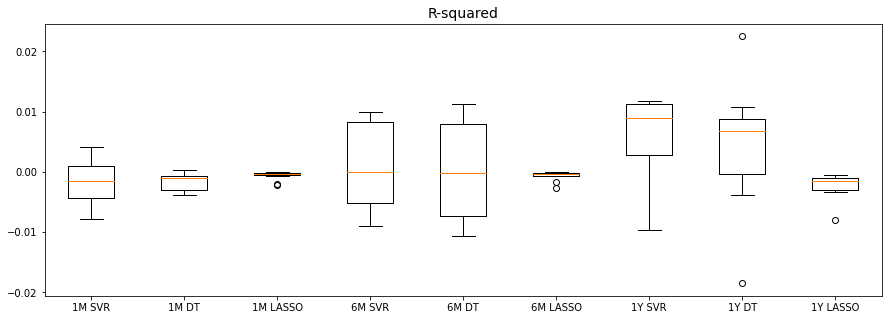

In [27]:
plt.subplots(figsize=(15, 5))

models = []
models.append((scores_month_SVR))
models.append((scores_month_DT))
models.append((scores_month_LASSO))

models.append((scores_hyear_SVR))
models.append((scores_hyear_DT))
models.append((scores_hyear_LASSO)) 

models.append((scores_year_SVR))
models.append((scores_year_DT))
models.append((scores_year_LASSO))


plt.boxplot(models)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['1M SVR', '1M DT', '1M LASSO', '6M SVR', '6M DT', '6M LASSO', '1Y SVR', '1Y DT', '1Y LASSO'])
plt.title('R-squared', fontsize=14)
plt.show()

### Mean Absolute Error

In [28]:
print("Mean absolute error (MAE) for 1M SVR Model: %.5f" % SVR_1M_MAE)
print("Mean absolute error (MAE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MAE)
print("Mean absolute error (MAE) for 1M LASSO Regression: %.5f" % LASSO_1M_MAE)

Mean absolute error (MAE) for 1M SVR Model: 0.05372
Mean absolute error (MAE) for 1M Decision Tree Regressor: 0.05365
Mean absolute error (MAE) for 1M LASSO Regression: 0.05349


**According to MAE, the best model is LASSO Regression for half year interval.**

In [29]:
print("Mean absolute error (MAE) for 6M SVR Model: %.5f" % SVR_6M_MAE)
print("Mean absolute error (MAE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MAE)
print("Mean absolute error (MAE) for 6M LASSO Regression: %.5f" % LASSO_6M_MAE)

Mean absolute error (MAE) for 6M SVR Model: 0.08454
Mean absolute error (MAE) for 6M Decision Tree Regressor: 0.08484
Mean absolute error (MAE) for 6M LASSO Regression: 0.08467


**According to MAE, the best model is SVR for half year interval.**

In [30]:
print("Mean absolute error (MAE) for 1Y SVR Model: %.5f" % SVR_1Y_MAE)
print("Mean absolute error (MAE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MAE)
print("Mean absolute error (MAE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MAE)

Mean absolute error (MAE) for 1Y SVR Model: 0.10277
Mean absolute error (MAE) for 1Y Decision Tree Regressor: 0.10338
Mean absolute error (MAE) for 1Y LASSO Regression: 0.10455


**According to MAE, the best model is SVR for year interval.**

### Mean Squared Error

In [31]:
print("Mean squared error (MSE) for 1M SVR Model: %.5f" % SVR_1M_MSE)
print("Mean squared error (MSE) for 1M Decision Tree Regressor: %.5f" % DT_1M_MSE)
print("Mean squared error (MSE) for 1M LASSO Regression: %.5f" % LASSO_1M_MSE)

Mean squared error (MSE) for 1M SVR Model: 0.00552
Mean squared error (MSE) for 1M Decision Tree Regressor: 0.00551
Mean squared error (MSE) for 1M LASSO Regression: 0.00549


**According to MSE, the best model is Decision Tree Regressor for month interval.**

In [32]:
print("Mean squared error (MSE) for 6M SVR Model: %.5f" % SVR_6M_MSE)
print("Mean squared error (MSE) for 6M Decision Tree Regressor: %.5f" % DT_6M_MSE)
print("Mean squared error (MSE) for 6M LASSO Regression: %.5f" % LASSO_6M_MSE)

Mean squared error (MSE) for 6M SVR Model: 0.01412
Mean squared error (MSE) for 6M Decision Tree Regressor: 0.01419
Mean squared error (MSE) for 6M LASSO Regression: 0.01416


**According to MSE, the best model is SVR for half year interval.**

In [33]:
print("Mean squared error (MSE) for 1Y SVR Model: %.5f" % SVR_1Y_MSE)
print("Mean squared error (MSE) for 1Y Decision Tree Regressor: %.5f" % DT_1Y_MSE)
print("Mean squared error (MSE) for 1Y LASSO Regression: %.5f" % LASSO_1Y_MSE)

Mean squared error (MSE) for 1Y SVR Model: 0.02126
Mean squared error (MSE) for 1Y Decision Tree Regressor: 0.02141
Mean squared error (MSE) for 1Y LASSO Regression: 0.02170


**According to MSE, the best model is SVR for year interval.**

## Comparison performance of the models against a baseline model 

Mean absolute error for linear regression is 0.04445.

This is the lowest average magnitude of the errors.

Mean squared error for linear regression is 0.00349.

This model is the closest to finding the line of best fit.

**According to MAE and MSE, basic model is better than advantacted models.**